# NNDL Assignment-2
** Submitted by **
# Mocharla Nishanth Maurya 191EC226


Q.1. Write python code from scratch for simple Linear Regression problem, the following training
data are given.
## X = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
##Y = [5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8]
The model Y as a linear function of X (a) Use batch gradient descent learning algorithm to learn
model parameters for α = 0.01 choose random values of weights and bias and epochs=1000. Use
MSE as loss function with an appropriate convergence criterion. (b) Plot cost function (J) for the
learning duration (c) plot the regression line (d) repeat (b) to (c) for stochastic gradient descent and
Adam optimization algorithm 

In [144]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("ggplot") 
%matplotlib inline 

In [145]:
def MSE(y,y_hat):
  return np.sum((y-y_hat)**2)/len(y)

In [146]:
inputs = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
inputs = np.expand_dims(inputs, -1) 
X = np.append(np.ones(inputs.shape), inputs, axis = 1)
Y = np.array([5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8])
Y = np.expand_dims(Y, -1)

lr = 0.01
epochs = 1000

W = np.random.randn(2, 1)         

In [147]:
Y

array([[ 5.1],
       [ 6.1],
       [ 6.9],
       [ 7.8],
       [ 9.2],
       [ 9.9],
       [11.5],
       [12. ],
       [12.8]])

In [148]:
X.dot(W)

array([[-0.66309812],
       [-0.95635682],
       [-1.24961552],
       [-1.54287422],
       [-1.83613292],
       [-2.12939162],
       [-2.42265032],
       [-2.71590902],
       [-3.00916772]])

In [149]:
def gradient_descent(X, Y, W, lr):
    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)
    n = len(X) 
    dW = (2/n)*X.T.dot(Y - Y_hat)

    W += lr*dW 
    return W, J

In [150]:

lossHist_gradient_descent = [] 
weightHist_gradient_descent = []
for epoch in range(epochs): 
    W, J = gradient_descent(X, Y, W, lr) 
    lossHist_gradient_descent.append(J) 
    weightHist_gradient_descent.append(W.copy())

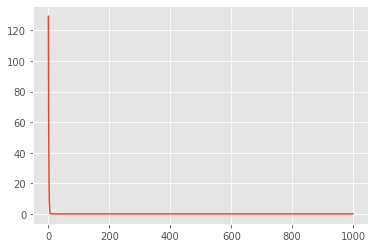

In [151]:


plt.plot(lossHist_gradient_descent)

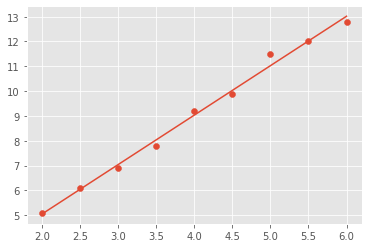

In [152]:













plt.scatter(inputs, Y) 
plt.plot(inputs, X.dot(W)) 
plt.show()

In [153]:
adam_params = {
    "S_dW" : np.zeros(W.shape), 
    "V_dW" : np.zeros(W.shape), 
    "beta_1" : 0.9, 
    "beta_2": 0.999, 
    "epsilon" : 10e-8 
}

def adam_gd(X, Y, W, adam_params, lr): 
    
    n = len(X)

    S_dW = adam_params["S_dW"]
    V_dW = adam_params["V_dW"] 
    beta_1 = adam_params["beta_1"]
    beta_2 = adam_params["beta_2"] 
    eps = adam_params["epsilon"] 

    n = len(X) 
    dW = (2/n)*X.T.dot(Y - X.dot(W))
    
    V_dW = beta_1*V_dW + (1-beta_1)*dW 
    S_dW = beta_2*S_dW + (1-beta_2)*np.square(dW) 
    
    W += lr*V_dW/(np.sqrt(S_dW) + eps) 

    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)

    adam_params["S_dW"] = S_dW 
    adam_params["V_dW"] = V_dW

    return W, J, adam_params


def stochastic_gradient_descent(X, Y, W, lr): 
    n = len(X) 
    shuffle_n = np.random.permutation(n)
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1)
        y_hat = x.T.dot(W)    
        dW = -x.dot(Y[i] - y_hat)*2/n 
        W -= lr*dW 

    J = MSE(Y, X.dot(W)) 
    # n = len(X) 
    return W, J

In [154]:
W_sgd = np.random.randn(2, 1)
lossHist_sgd = [] 
weightHist_sgd = []
for epoch in range(epochs): 
    W_sgd, J= stochastic_gradient_descent(X, Y, W_sgd, lr) 
    lossHist_sgd.append(J) 
    weightHist_sgd.append(W_sgd.copy())


W_adam_gd = np.random.randn(2, 1) 
lossHist_adam = []
weightHist_adam = [] 
for epoch in range(epochs):
    W_adam_gd, j, adam_params = adam_gd(X, Y, W_adam_gd, adam_params, lr) 
    lossHist_adam.append(j) 
    weightHist_adam.append(W_adam_gd.copy())


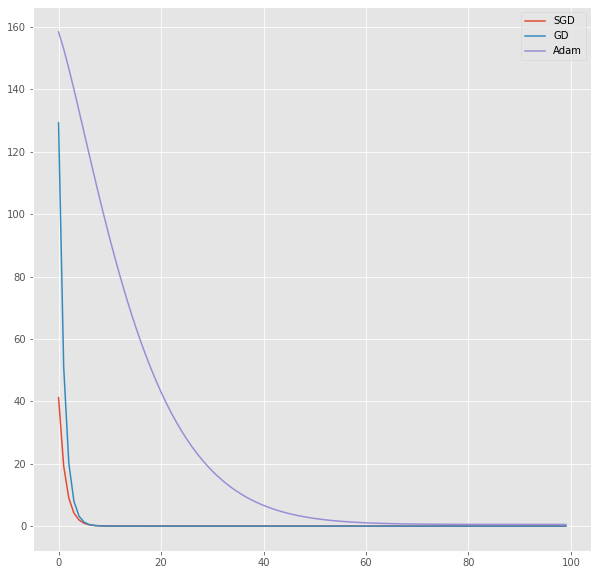

In [155]:
plt.figure(figsize = (10, 10))
plt.plot(lossHist_sgd[:100], label = "SGD")
plt.plot(lossHist_gradient_descent[:100], label = "GD")
plt.plot(lossHist_adam[:100], label = "Adam")
plt.legend()
plt.show()


Q.2. The neural network shown in Fig.1 has the following hyper parameters and input: Choose
random weights and bias of the neuron and learning rate =0.01 and inputs to the neuron and target
values are as follows. 

(a).Write a python code for predicted the output of neural network for given set of inputs using
Stochastic Gradient Descent algorithm for the loss functions: 
((i) Mean Square Error 
(ii) Squared Epsilon Hinge Loss (b) Plot comparative loss curve (c) repeat(a) and Adam optimization
algorithm 

In [156]:
X = np.array([[1, 4, 1], [1, 2, 8], [1, 1, 0], [1, 3, 2], [1, 1, 4], [1, 6, 7]])            
Y = np.array([2, -14, 1, -1, -7, -8]) 
Y = np.expand_dims(Y, -1) 

W = np.random.randn(3, 1) 
lr = 0.01

In [157]:
def init_params(shape):
    return {
        "S_dW" : np.zeros(shape), 
        "V_dW" : np.zeros(shape), 
        "beta_1" : 0.9, 
        "beta_2": 0.999, 
        "epsilon" : 10e-8 
    }

In [158]:
def SGD_MSE(X, Y, W, lr):
    n = len(X) 
    shuffle_n = np.random.permutation(n)
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1)
        y_hat = x.T.dot(W)    
        dW = -x.dot(Y[i] - y_hat)*2/n 
        W -= lr*dW 

    J = MSE(Y, X.dot(W)) 
    # n = len(X) 
    return W, J 

def SGD_MSE_Adam(X, Y, W, adam_params, lr): 
    n = len(X)

    S_dW = adam_params["S_dW"]
    V_dW = adam_params["V_dW"] 
    beta_1 = adam_params["beta_1"]
    beta_2 = adam_params["beta_2"] 
    eps = adam_params["epsilon"] 

    shuffle_n = np.random.permutation(n) 
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1) 
        y_hat = x.T.dot(W) 
        dW -= x.dot(Y[i] - y_hat)*2/n 

        V_dW = beta_1*V_dW + (1-beta_1)*dW 
        S_dW = beta_2*S_dW + (1-beta_2)*np.square(dW) 

        W -= lr*V_dW/(np.sqrt(S_dW) + eps) 

    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)

    adam_params["S_dW"] = S_dW 
    adam_params["V_dW"] = V_dW

    return W, J, adam_params

In [159]:
epochs = 500

W_sgd = np.random.randn(3, 1)
lossHist_sgd = [] 
weightHist_sgd = []
for epoch in range(epochs): 
    W_sgd, J= SGD_MSE(X, Y, W_sgd, lr) 
    lossHist_sgd.append(J) 
    weightHist_sgd.append(W_sgd.copy())


W_adam = np.random.randn(3, 1)
adam_params = init_params(W_adam.shape) 

lossHist_adam = []
weightHist_adam = [] 
for epoch in range(epochs):
    W_adam, j, adam_params = SGD_MSE_Adam(X, Y, W_adam, adam_params, lr) 
    lossHist_adam.append(j) 
    weightHist_adam.append(W_adam.copy())

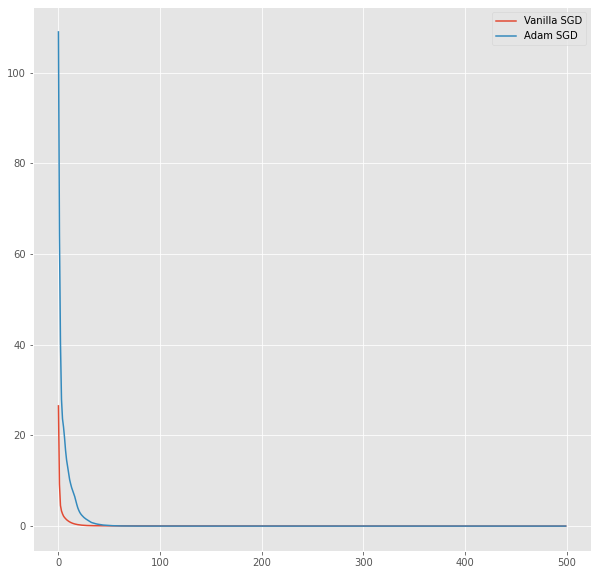

In [160]:
plt.figure(figsize = (10, 10))
plt.plot(lossHist_sgd, label = "Vanilla SGD")
plt.plot(lossHist_adam, label = "Adam SGD")
plt.legend()
plt.show()

Q 3. A group of 20 students studied 0 to 6 hours for the exam. Some passed and others failed. Results
are given below 


| Student | Hours studied - x | Result (0 – fail, 1 – pass) - y | 
| - | --- | --- | 
| 1 | 0.5 | 0 | 
| 2 | 0.75 | 0 | 
| 3 | 1.00 | 0 | 
| 4 | 1.25 | 0 | 
| 5 | 1.50 | 0 | 
| 6 | 1.75 | 0 | 
| 7 | 1.75 | 1 | 
| 8 | 2.00 | 0 | 
| 9 | 2.25 | 1 | 
| 10 | 2.50 | 0 | 
| 11 | 2.75 | 1 | 
| 12 | 3.00 | 0 | 
| 13 | 3.25 | 1 | 
| 14 | 3.50 | 0 | 
| 15 | 4.00 | 1 | 
| 16 | 4.25 | 1 | 
| 17 | 4.50 | 1 | 
| 18 | 4.75 | 1 | 
| 19 | 5.00 | 1 | 
| 20 | 5.50 | 1 | 
(a). Write python code for scratch to build neural network model to determine the optimal linear 
hypothesis using linear regression to predict if a student passes or not based on the number hours 
studied with the use for stochastic gradient descent and Adam optimization algorithm with model 
parameters for α = 0.01 choose random values of weights and bias and epochs=10000. Use 
appropriate regression loss function. 
(b). (i).Write python code from scratch to determine the optimal logistic hypothesis using logistic 
regression to predict if a student passes or not based on the number hours studied with the use for 
stochastic gradient descent with model parameters for α = 0.01 choose random values of weights and 
bias and epochs=400; Loss function: Binary Cross Entropy (BCE), Threshold value=0.5 (a) plot the 
cost function vs epoch (b) Predict pass or failed result of your designed model on random study hours
enter by you. (ii) Repeat part (i) analysis with Dice Loss function. 
(iii) Repeat part (i) analysis with Adam optimization algorithm.

In [161]:
def sigmoid(x) :
  return 1/(1+np.exp(-x))

In [162]:
def d_sigmoid(x) :
  return sigmoid(x)*(1-sigmoid(x))

In [163]:
def init_params(shape):
    return {
        "S_dW" : np.zeros(shape), 
        "V_dW" : np.zeros(shape), 
        "beta_1" : 0.9, 
        "beta_2": 0.999, 
        "epsilon" : 10e-8 
    }

In [164]:
inputs = np.array([0.5, 0.75, 1.00, 1.25, 1.5, 1.75, 1.75, 2.00, 2.25, 2.5, 2.75, 3.00, 3.25, 3.5, 4.00, 4.25, 4.5, 4.75, 5.00, 5.50])

X = np.append(np.ones((20, 1)), np.expand_dims(inputs, -1), axis = 1)
Y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
Y = np.expand_dims(Y, -1) 

In [165]:
epochs_a = 10000 
lr = 0.01 

In [166]:
def SGD_MSE_Adam(X, Y, W, adam_params, lr): 
    n = len(X)

    S_dW = adam_params["S_dW"]
    V_dW = adam_params["V_dW"] 
    beta_1 = adam_params["beta_1"]
    beta_2 = adam_params["beta_2"] 
    eps = adam_params["epsilon"] 

    shuffle_n = np.random.permutation(n) 
    dW = np.zeros(W.shape) 

    for i in shuffle_n: 
        x = np.expand_dims(X[i].copy(), -1) 
        y_hat = x.T.dot(W) 
        dW -= x.dot(Y[i] - y_hat)*2/n 

        V_dW = beta_1*V_dW + (1-beta_1)*dW 
        S_dW = beta_2*S_dW + (1-beta_2)*np.square(dW) 

        W -= lr*V_dW/(np.sqrt(S_dW) + eps) 

    Y_hat = X.dot(W) 
    J = MSE(Y, Y_hat)

    adam_params["S_dW"] = S_dW 
    adam_params["V_dW"] = V_dW

    return W, J, adam_params

In [167]:
from tqdm import tqdm, trange

W_adam = np.random.randn(2, 1)
adam_params = init_params(W_adam.shape) 

lossHist_adam = []
weightHist_adam = [] 
for epoch in trange(epochs_a, ascii=False, desc="Training", ncols=100):
    W_adam, j, adam_params = SGD_MSE_Adam(X, Y, W_adam, adam_params, lr) 
    lossHist_adam.append(j) 
    weightHist_adam.append(W_adam.copy())

Training: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1652.64it/s]


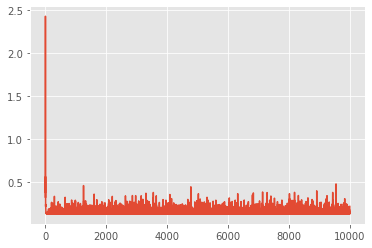

In [168]:

plt.plot(lossHist_adam)

In [169]:
Y_hat = sigmoid(X.dot(W_adam))
d_sigmoid(Y_hat)

array([[0.23428683],
       [0.2331141 ],
       [0.23191162],
       [0.23068456],
       [0.22943835],
       [0.22817856],
       [0.22817856],
       [0.22691086],
       [0.22564088],
       [0.22437412],
       [0.22311589],
       [0.22187121],
       [0.22064476],
       [0.21944085],
       [0.21711559],
       [0.21600061],
       [0.21492084],
       [0.21387831],
       [0.21287458],
       [0.21098773]])

In [170]:
def binaryCrossEntropyLoss(y_true, y_pred):
    if(type(y_true) != np.ndarray):
        y_true = np.array(y_true) 
    if(type(y_pred) != np.ndarray):
        y_pred = np.array(y_pred) 
    return -(y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred)).mean()

In [171]:
epochs_b = 400

def GD_BCE(X, Y, W, lr):
    n = len(X) 
    Y_hat = sigmoid(X.dot(W)) 

    dW = X.T.dot(d_sigmoid(Y_hat)*(-Y/Y_hat + (1-Y)/(1-Y_hat))) 
    W -= lr*dW 
    J = binaryCrossEntropyLoss(Y, sigmoid(X.dot(W))) 

    return W, J 

In [172]:
X.shape

(20, 2)

In [175]:
W_gd_bce = np.random.randn(2, 1)
lossHist_gd_bce = [] 
weightHist_gd_bce = []
for epoch in range(epochs_b): 
    W_gd_bce, J = GD_BCE(X, Y, W_gd_bce, lr) 
    lossHist_gd_bce.append(J) 
    weightHist_gd_bce.append(W_gd_bce.copy())

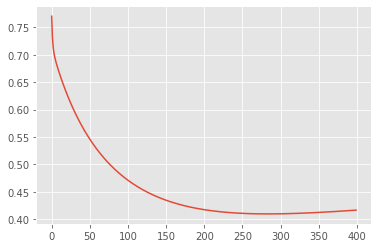

In [176]:
plt.plot(lossHist_gd_bce)
plt.show()

Q.4. Build a model to recognize different handwritten digits from MNIST dataset by using multinomial logistic regression. Use of Adam optimization algorithm to learn model with parameters for α = 0.01, epoch = 40000 and random parameters of the model and Loss function: Softmax loss function.
##(a) Plot the cost function vs epoch
##(b) Predict the digit of your designed model on random test data enter by you
##(c) print confusion matrix
##(d) calculate classification metrics such as precision, recall, f1-score and accuracy

In [177]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

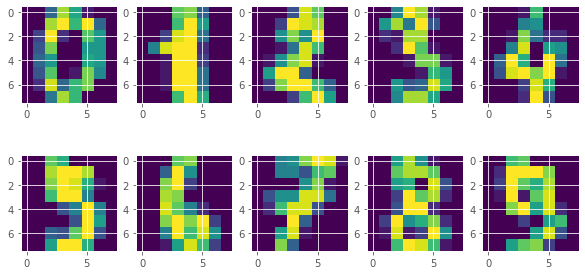

In [178]:
digits = load_digits()
fig, ax = plt.subplots(2,5, figsize = (10, 5))
ax[0,0].imshow(digits.images[0])
ax[0,1].imshow(digits.images[1])
ax[0,2].imshow(digits.images[2])
ax[0,3].imshow(digits.images[3])
ax[0,4].imshow(digits.images[4])
ax[1,0].imshow(digits.images[5])
ax[1,1].imshow(digits.images[6])
ax[1,2].imshow(digits.images[7])
ax[1,3].imshow(digits.images[8])
ax[1,4].imshow(digits.images[9])
plt.show();

In [179]:
lr = 0.01 
epochs = 400 
coi = 0 

In [180]:
class LogisticRegression():
    
    def set_values(self, initial_params, alpha=0.01, max_iter=5000, class_of_interest=0):
        self.params = initial_params
        self.alpha = alpha
        self.max_iter = max_iter
        self.class_of_interest = class_of_interest
    
    @staticmethod
    def _sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def predict(self, x_bar, params):
                
        return self._sigmoid(np.dot(params, x_bar))
    
    def _compute_cost(self, input_var, output_var, params):
        
        cost = 0
        for x, y in zip(input_var, output_var):
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, params)
            
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat)
            
        return cost
    
    def train(self, input_var, label, print_iter = 5000):
        
        iteration = 1
        while iteration < self.max_iter:
            if iteration % print_iter == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
            
            for i, xy in enumerate(zip(input_var, label)):
                x_bar = np.array(np.insert(xy[0], 0, 1))
                y_hat = self.predict(x_bar, self.params)
                
                y_binary = 1.0 if xy[1] == self.class_of_interest else 0.0
                gradient = (y_binary - y_hat) * x_bar
                self.params += self.alpha * gradient
            
            iteration +=1
        
        return self.params

    def test(self, input_test, label_test):
        self.total_classifications = 0
        self.correct_classifications = 0
        
        for x,y in zip(input_test, label_test):
            self.total_classifications += 1
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, self.params)
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            
            if y_hat >= 0.5 and  y_binary == 1:
                self.correct_classifications += 1
              
            if y_hat < 0.5 and  y_binary != 1:
                self.correct_classifications += 1
                
        self.accuracy = self.correct_classifications / self.total_classifications
            
        return self.accuracy

In [181]:
digits_train, digits_test, digits_label_train, digits_label_test =train_test_split(digits.data, digits.target, test_size=0.20)

In [182]:
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 1000
digits_regression_model_0 = LogisticRegression()
digits_regression_model_0.set_values(params_0, alpha, max_iter, 0)

params =\
digits_regression_model_0.train(digits_train / 16.0, digits_label_train, 10)

iteration: 10
cost: -41.3979125216786
iteration: 20
cost: -25.865255194829558
iteration: 30
cost: -19.980016162822313
iteration: 40
cost: -16.697705636720713
iteration: 50
cost: -14.54217083912186
iteration: 60
cost: -12.99080692686724
iteration: 70
cost: -11.806579151500863
iteration: 80
cost: -10.864727707018412
iteration: 90
cost: -10.092649021108008
iteration: 100
cost: -9.444900112046154
iteration: 110
cost: -8.891416820110331
iteration: 120
cost: -8.411420634000738
iteration: 130
cost: -7.9900332557630485
iteration: 140
cost: -7.616284764724177
iteration: 150
cost: -7.281885435174325
iteration: 160
cost: -6.980438151025506
iteration: 170
cost: -6.706916253554588
iteration: 180
cost: -6.4573072938407545
iteration: 190
cost: -6.228363830886959
iteration: 200
cost: -6.017425242521364
iteration: 210
cost: -5.822287812484856
iteration: 220
cost: -5.641108358453788
iteration: 230
cost: -5.472331621283891
iteration: 240
cost: -5.314634784677082
iteration: 250
cost: -5.16688454204464
ite

In [184]:
digits_accuracy = digits_regression_model_0.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a Zero digit in test set: {digits_accuracy}')

Accuracy of prediciting a Zero digit in test set: 0.9972222222222222


In [185]:
alpha = 1e-2
params_0 = np.zeros(len(digits.data[1]) + 1)

max_iter = 1000
digits_regression_model_1 = LogisticRegression()
digits_regression_model_1.set_values(params_0, alpha, max_iter, 1)

params =\
digits_regression_model_1.train(digits_train / 16.0, digits_label_train, 10)

iteration: 10
cost: -131.65869432257819
iteration: 20
cost: -104.50045402285023
iteration: 30
cost: -91.80925411627818
iteration: 40
cost: -83.74951124661392
iteration: 50
cost: -77.94419566640819
iteration: 60
cost: -73.45972864432946
iteration: 70
cost: -69.83626833504786
iteration: 80
cost: -66.81489655608289
iteration: 90
cost: -64.23617454824577
iteration: 100
cost: -61.995356732598225
iteration: 110
cost: -60.02015752719014
iteration: 120
cost: -58.25872222246071
iteration: 130
cost: -56.67267123090884
iteration: 140
cost: -55.232857733731734
iteration: 150
cost: -53.91666421006085
iteration: 160
cost: -52.70621511231122
iteration: 170
cost: -51.58715774849242
iteration: 180
cost: -50.54780815414278
iteration: 190
cost: -49.57853864475634
iteration: 200
cost: -48.67132969607012
iteration: 210
cost: -47.81943618828867
iteration: 220
cost: -47.01713489495709
iteration: 230
cost: -46.25953075128305
iteration: 240
cost: -45.542406346533774
iteration: 250
cost: -44.8621036688463
itera

In [187]:
digits_accuracy = digits_regression_model_1.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a One digit in test set: {digits_accuracy}')

Accuracy of prediciting a One digit in test set: 0.9722222222222222


Q.5. Build a model to discriminate the red, green and blue points in 2-dimensional space shown below:
##Here, 0=red, 1=green and 2= blue dots
In other words, given a point in 2-dimensions, x=(x1, x2), predict output either red, green or blue by using multinomial logistic regression. (a) (i) Compare predicted results with ground truth using bar chat plot (ii) plot loss curve (iii) print confusion matrix (iv) calculate classification metrics such as precision, recall, f1-score and accuracy (v) Visualize classified data by Scatter plot. Use of gradient descent learning algorithm to learn model with parameters for α = 0.01, Softmax loss function and random parameters of the model. (b) repeat part (a) Use Stochastic gradient descent algorithm to learn model (c) repeat part (a) with use of Adam Optimization algorithm to learn model



In [188]:

from sklearn import metrics
from sklearn.metrics import classification_report


In [189]:
X= np.array([[-0.1, 1.4],[-0.5, 0.2],[ 1.3, 0.9],[-0.6, 0.4],[-1.6, 0.2],[ 0.2, 0.2],[-0.3,-0.4],[ 0.7,-0.8],[ 1.1,-1.5],
            [-1.0, 0.9],[-0.5, 1.5],[-1.3,-0.4],[-1.4,-1.2],[-0.9,-0.7],[ 0.4,-1.3],[-0.4, 0.6],[ 0.3,-0.5],[-1.6,-0.7],
            [-0.5,-1.4],[-1.0,-1.4]])

y= np.array ([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])

In [192]:
class MultiClassLogisticRegression:
    
    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
    
    def fit(self, X, y, batch_size=64, lr=0.01, rand_seed=4, verbose=False): 
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

0.95


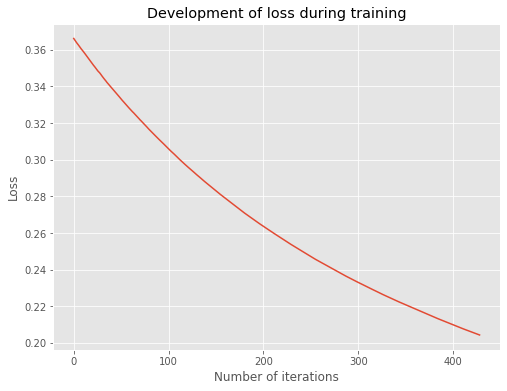

In [193]:
lreg = MultiClassLogisticRegression(thres=1e-3)
classifier = lreg.fit(X,y,lr=0.0001)
print(lreg.score(X, y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lreg.loss)), lreg.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [194]:
print(y)
y_pred = lreg.predict_classes(X)
print(y_pred)

[0 0 1 0 2 1 1 1 1 0 0 2 2 2 1 0 1 2 2 2]
[0 0 1 0 2 1 2 1 1 0 0 2 2 2 1 0 1 2 2 2]


Accuracy Score: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



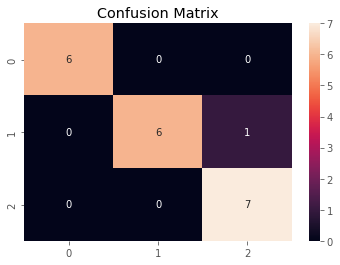

In [195]:
import seaborn as sns
cm = metrics.confusion_matrix(y, y_pred)
ax = sns.heatmap(cm, annot=True)
ax.set_title("Confusion Matrix")

print("Accuracy Score:", metrics.accuracy_score(y, y_pred))  
#Create classification report
class_report=classification_report(y, y_pred)
print(class_report)
